In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import sqlite3
from datetime import date
from datetime import datetime as dt
import hashlib
import sys
import os
import locale
import re
import requests as rq
import wbdata as wb
from contextlib import contextmanager
import pytz
from datetime import timedelta
# from currency_converter import CurrencyConverter

# cc = CurrencyConverter()
from matplotlib import pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn import preprocessing as prep
import numpy as np
from technical_analysis import candles
from technical_analysis import overlays
from technical_analysis import indicators
from technical_analysis.backtest.strategy import (
    MovingAverageCrossover,
    CenterLineCrossover,
    Divergence,
)
from technical_analysis.backtest.backtest import Backtest

import mplfinance as mpf

project_dir = "/home/mi/docs/prog/python/tradeDB"
os.chdir(project_dir)

from importlib import reload

# from workers import sql
from workers import api

# from workers.common import read_json, hash_table
import tradeDB

In [2]:
pkn = tradeDB.Trader()
pkn.get(
    tab="stock", 
    symbol="ale", 
    columns="-indexes;-industry;-info", 
    start_date="1-1-2020",
    update_dates=False
)

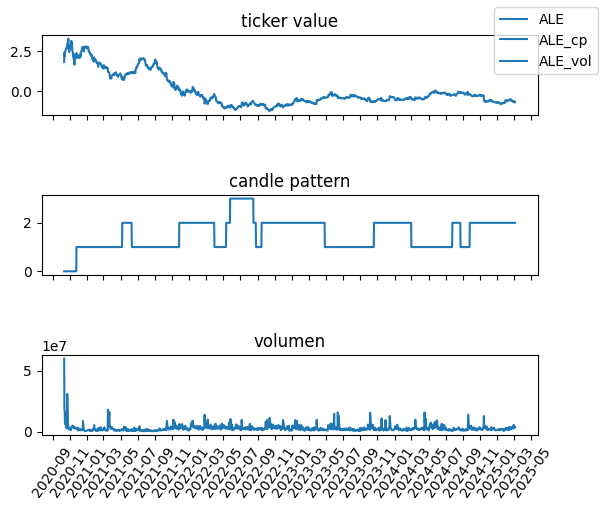

In [3]:
pkn.candle_pattern("daily")
pkn.plot()

In [ ]:
pkn.candle_pattern("daily")


,high,open,symbol,date,industry,info,low,name,vol,val,from_date,country,to_date,start_quote,indexes,candle_pattern,formation
0,72.100,65.00,ALE,2020-10-12,NULL,NULL,60.000,ALLEGRO,59867551,70.000,2020-10-12,PL,2025-03-05,2020-10-12,WIG,0,
1,72.100,65.00,ALE,2020-10-12,NULL,NULL,60.000,ALLEGRO,59867551,70.000,2020-10-12,PL,2025-03-05,2020-10-12,WIG20,0,
2,80.000,72.00,ALE,2020-10-13,NULL,NULL,71.080,ALLEGRO,18452974,80.000,2020-10-12,PL,2025-03-05,2020-10-12,WIG,0,
3,80.000,72.00,ALE,2020-10-13,NULL,NULL,71.080,ALLEGRO,18452974,80.000,2020-10-12,PL,2025-03-05,2020-10-12,WIG20,0,
4,90.300,84.00,ALE,2020-10-14,NULL,NULL,71.250,ALLEGRO,16731591,75.960,2020-10-12,PL,2025-03-05,2020-10-12,WIG,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,28.350,28.04,ALE,2025-03-03,NULL,NULL,27.805,ALLEGRO,3219726,28.090,2020-10-12,PL,2025-03-05,2020-10-12,WIG20,2,
2196,27.890,27.88,ALE,2025-03-04,NULL,NULL,27.405,ALLEGRO,3894474,27.560,2020-10-12,PL,2025-03-05,2020-10-12,WIG,2,
2197,27.890,27.88,ALE,2025-03-04,NULL,NULL,27.405,ALLEGRO,3894474,27.560,2020-10-12,PL,2025-03-05,2020-10-12,WIG20,2,
2198,28.795,27.86,ALE,2025-03-05,NULL,NULL,27.800,ALLEGRO,3683602,28.615,2020-10-12,PL,2025-03-05,2020-10-12,WIG,2,


In [20]:
req_cols = ["open", "high", "low", "val", "vol", "symbol", "date"]
df = (
    pkn.data.reindex(columns=req_cols)
    .drop_duplicates()
    .rename(columns={"val": "close", "vol": "volume"})
    .reset_index(drop=True)
    .sort_values(by=["symbol", "date"])
)
df["ta"] = 0

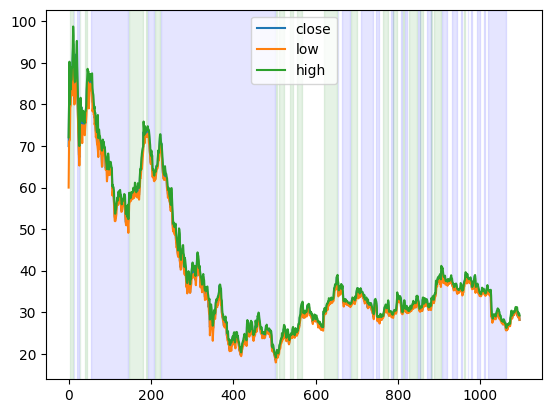

In [10]:
df["down"] = indicators.trend_down(df["low"])
df["up"] = indicators.trend_up(df["high"])

trend = {}
for col in ["down", "up"]:
    trend[col] = [
        (i, j)
        for i, j in zip(
            df.index[~df[col].shift(1).astype(bool) & df[col]],
            df.index[~df[col].shift(-1).astype(bool) & df[col]],
        )
    ]


plt.plot(df["close"], label="close")
plt.plot(df["low"], label="low")
plt.plot(df["high"], label="high")
[plt.axvspan(x1, x2, alpha=0.1, color="b") for x1, x2 in trend["down"]]
[plt.axvspan(x1, x2, alpha=0.1, color="g") for x1, x2 in trend["up"]]
plt.legend()

In [11]:
from assets.ta_trategy import strategy

ema9/ema20
{'benchmark': np.float64(-0.5980714285714285), 'strategy': np.float64(-0.3407490498542597), 'max_drawdown': np.float64(-0.13455657492354745), 'max_profit': np.float64(0.09525952595259539), 'avg_return': np.float64(-0.02839575415452164), 'std_return': np.float64(0.07261894267213527), 'returns': [np.float64(-0.08939580764488286), np.float64(0.05700000000000003), np.float64(-0.10166150380174598), np.float64(-0.13455657492354745), np.float64(-0.049115913555992145), np.float64(0.05152091254752853), np.float64(0.057565789473684216), np.float64(-0.041116005873715084), np.float64(-0.10332541567695963), np.float64(-0.04437500000000005), np.float64(0.09525952595259539), np.float64(-0.03854905635122468)]}


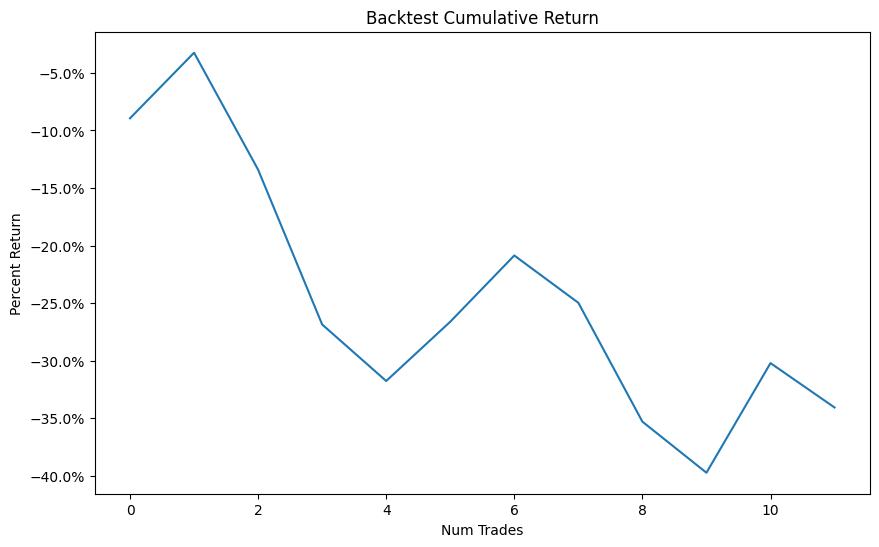

ema50/ema200
{'benchmark': np.float64(-0.5980714285714285), 'strategy': np.float64(-0.2913351896048795), 'max_drawdown': np.float64(-0.2385308936621586), 'max_profit': np.float64(-0.052804295942720854), 'avg_return': np.float64(-0.14566759480243974), 'std_return': np.float64(0.09286329885971888), 'returns': [np.float64(-0.052804295942720854), np.float64(-0.2385308936621586)]}


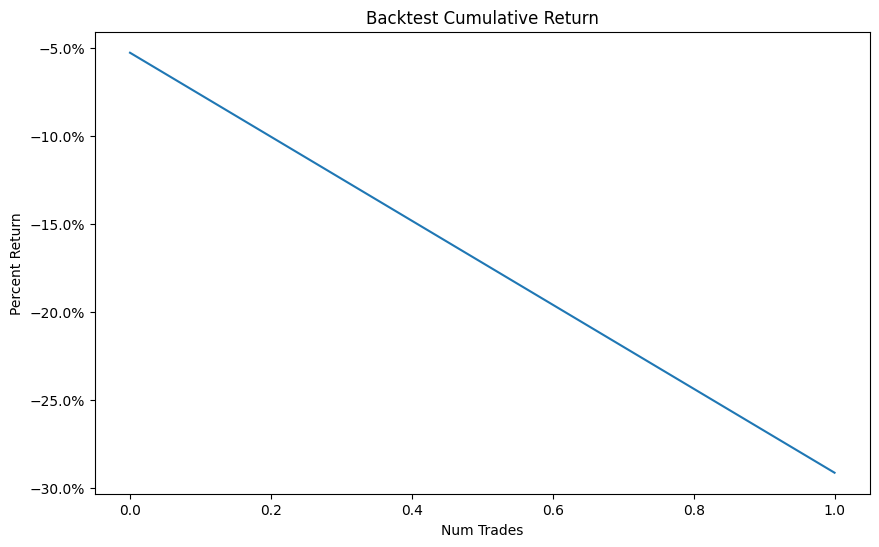

macd_Xover
{'benchmark': np.float64(-0.5980714285714285), 'strategy': np.float64(-0.09484790883545866), 'max_drawdown': np.float64(-0.17966493356441363), 'max_profit': np.float64(0.23182207014542353), 'avg_return': np.float64(-0.0063231939223639105), 'std_return': np.float64(0.12272635485133407), 'returns': [np.float64(-0.10340705319784824), np.float64(0.16603448275862062), np.float64(-0.11931818181818189), np.float64(-0.13645569620253167), np.float64(-0.1220050441361916), np.float64(0.03901611535199329), np.float64(0.23182207014542353), np.float64(0.15131578947368426), np.float64(-0.062899332670737), np.float64(0.007704654895666196), np.float64(-0.03125), np.float64(-0.03003754693366711), np.float64(0.14650455927051673), np.float64(-0.052207792207792154), np.float64(-0.17966493356441363)]}


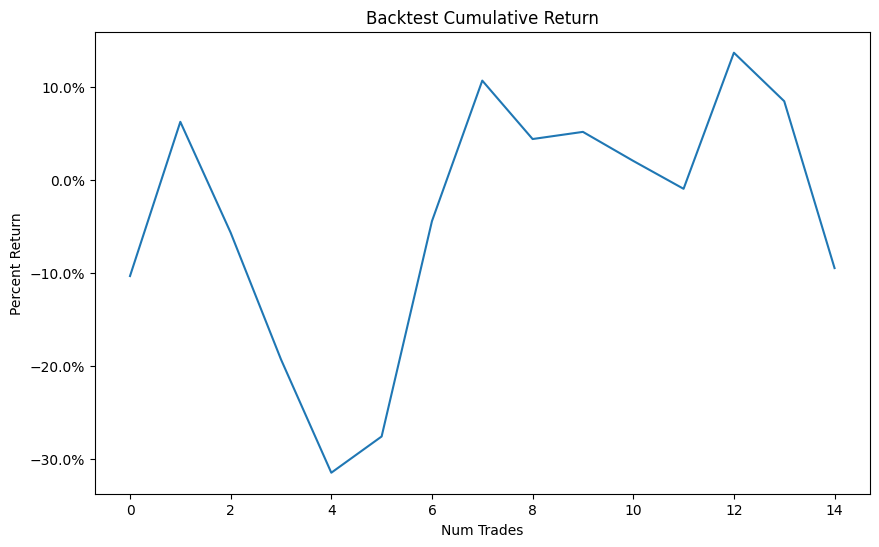

macd_0over
{'benchmark': np.float64(-0.5980714285714285), 'strategy': np.float64(-0.2337660416205608), 'max_drawdown': np.float64(-0.15920455866961272), 'max_profit': np.float64(0.10687500000000005), 'avg_return': np.float64(-0.02337660416205608), 'std_return': np.float64(0.0840605735728866), 'returns': [np.float64(-0.15920455866961272), np.float64(-0.009874608150470148), np.float64(0.02903351519875296), np.float64(-0.05237154150197625), np.float64(0.08316263826300702), np.float64(0.04835526315789482), np.float64(-0.1002413744143122), np.float64(-0.10119760479041913), np.float64(0.10687500000000005), np.float64(-0.07830277071342517)]}


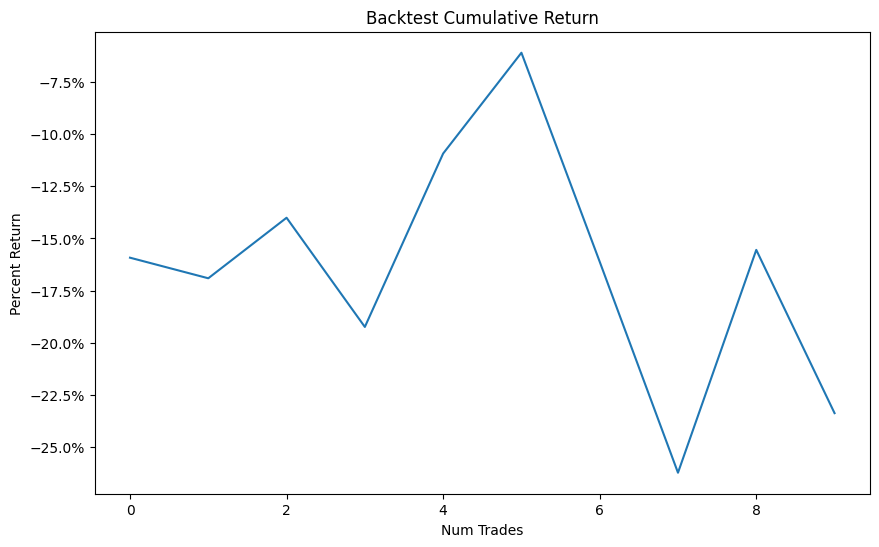

macd_div&Xover
{'benchmark': np.float64(-0.5980714285714285), 'strategy': np.int64(0), 'max_drawdown': np.int64(0), 'max_profit': np.int64(0), 'avg_return': np.float64(0.0), 'std_return': np.float64(0.0), 'returns': [0]}


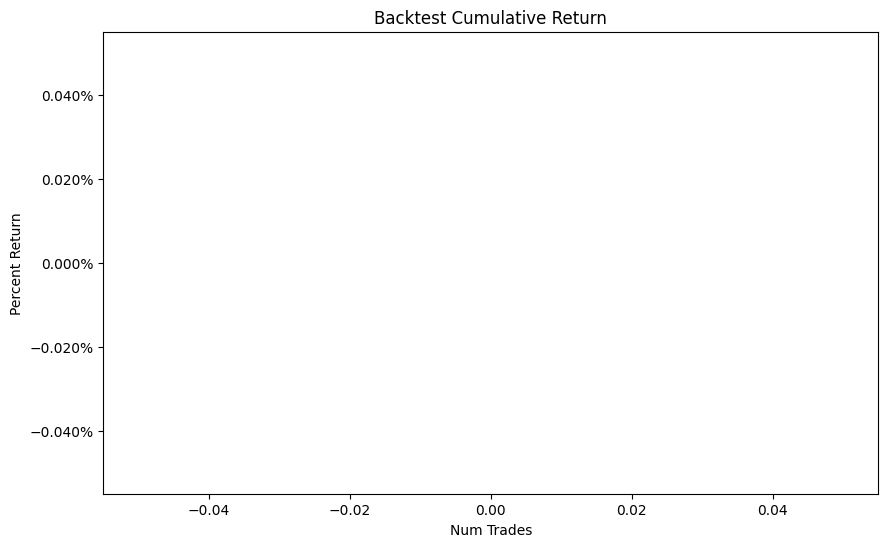

rsi
{'benchmark': np.float64(-0.5980714285714285), 'strategy': np.float64(-0.1007283817152118), 'max_drawdown': np.float64(-0.11985444621332718), 'max_profit': np.float64(0.01912606449811538), 'avg_return': np.float64(-0.0503641908576059), 'std_return': np.float64(0.06949025535572129), 'returns': [np.float64(0.01912606449811538), np.float64(-0.11985444621332718)]}


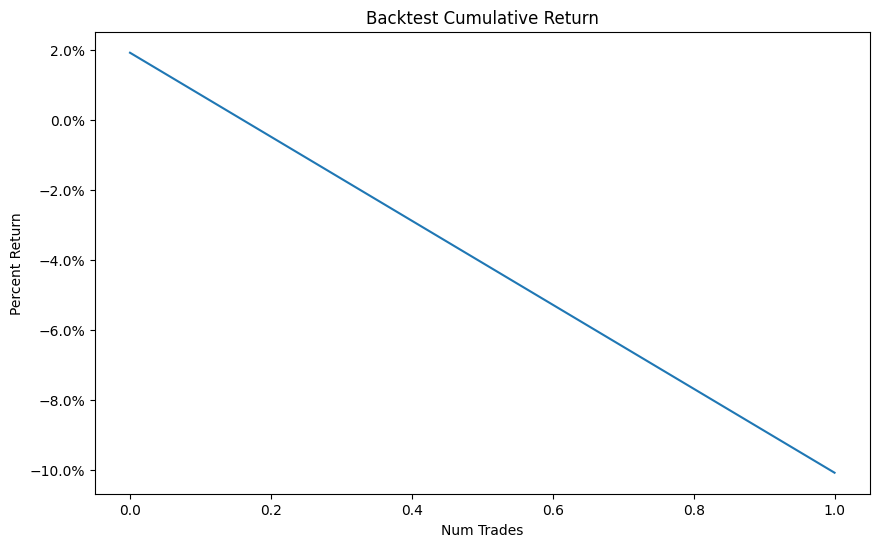

stochastic_0over
{'benchmark': np.float64(-0.5980714285714285), 'strategy': np.float64(0.31461118495900425), 'max_drawdown': np.float64(-0.21209599112220842), 'max_profit': np.float64(0.21856899488926743), 'avg_return': np.float64(0.012100430190730933), 'std_return': np.float64(0.10320835256471447), 'returns': [np.float64(0.08278145695364239), np.float64(-0.21209599112220842), np.float64(0.015930735930735962), np.float64(0.023195084485407146), np.float64(-0.12527472527472533), np.float64(-0.16025092671799263), np.float64(-0.005974773179906971), np.float64(0.1383928571428572), np.float64(-0.034713198440690506), np.float64(0.001968503937007902), np.float64(0.17676767676767677), np.float64(0.048979591836734664), np.float64(0.21856899488926743), np.float64(0.03384227923815529), np.float64(-0.11904761904761901), np.float64(0.06097560975609756), np.float64(0.10890433631247928), np.float64(-0.05246913580246912), np.float64(-0.025157232704402538), np.float64(0.17914519551379193), np.float64(-0

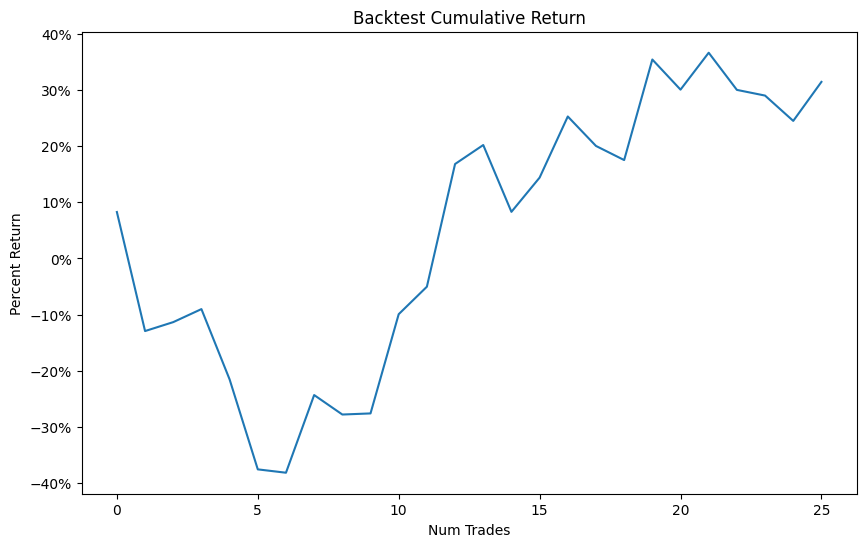

obv
{'benchmark': np.float64(-0.5980714285714285), 'strategy': np.int64(0), 'max_drawdown': np.int64(0), 'max_profit': np.int64(0), 'avg_return': np.float64(0.0), 'std_return': np.float64(0.0), 'returns': [0]}


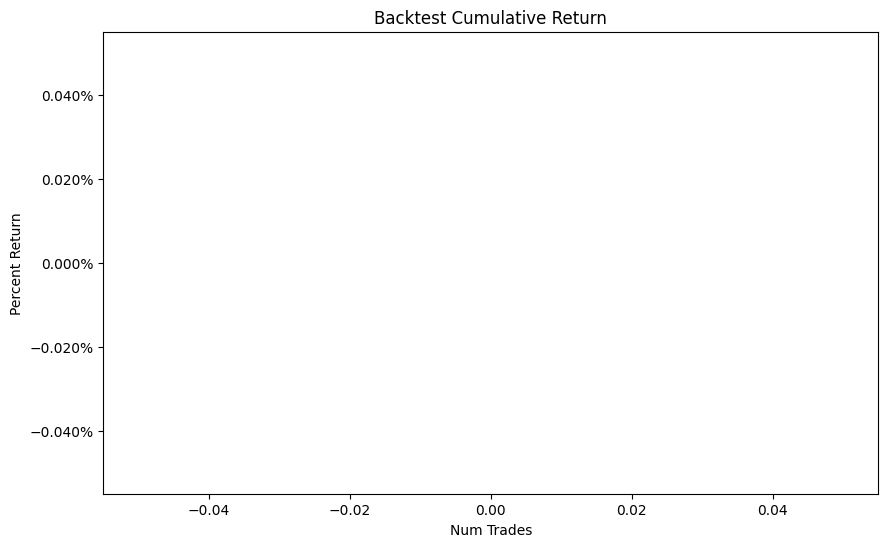

ad
{'benchmark': np.float64(-0.5980714285714285), 'strategy': np.int64(0), 'max_drawdown': np.int64(0), 'max_profit': np.int64(0), 'avg_return': np.float64(0.0), 'std_return': np.float64(0.0), 'returns': [0]}


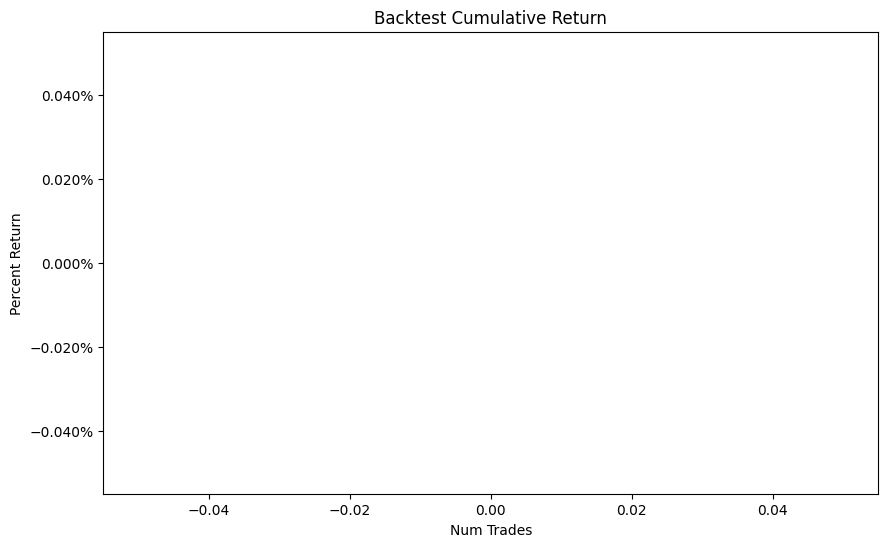

adx
{'benchmark': np.float64(-0.5980714285714285), 'strategy': np.float64(0.1090812658377041), 'max_drawdown': np.float64(-0.11267605633802817), 'max_profit': np.float64(0.22175732217573227), 'avg_return': np.float64(0.05454063291885205), 'std_return': np.float64(0.1672166892568802), 'returns': [np.float64(-0.11267605633802817), np.float64(0.22175732217573227)]}


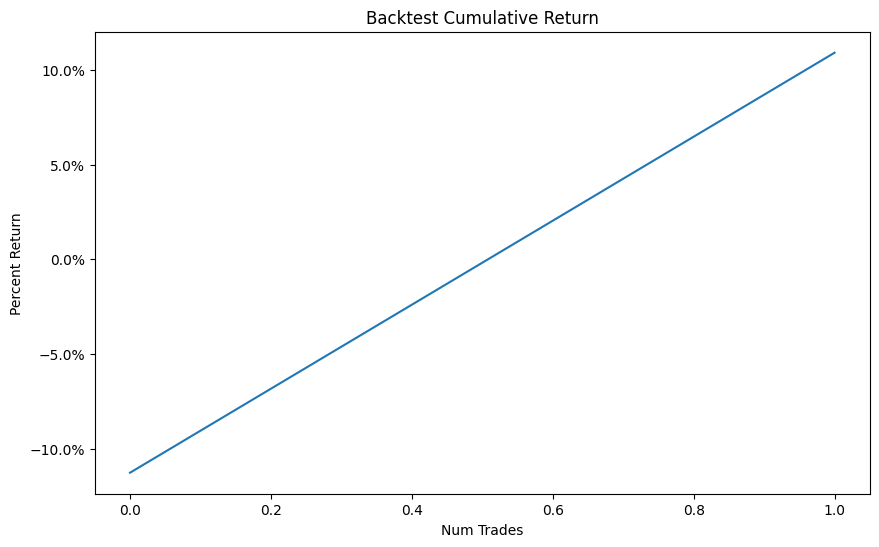

In [25]:
# strategy

for s in strategy:
    # prepare columns
    for col in s["columns_req"]:
        df[col] = s["columns_req"][col]["func"](df, **s["columns_req"][col]["kwargs"])

    test = Backtest(entry_criteria=s["entry"], exit_criteria=s["exit"])
    test.run(df)
    #if test.results['strategy'] > 0.1:
    #if s['name'] == 'stochastic_0over':
    df["ta"] += test.signal()
    print(s["name"])
    print(test.results)
    test.plot()

df["ta"] = df["ta"].cumsum()

In [13]:
fig = make_subplots(rows=3,cols=1, shared_xaxes=True)
fig.add_trace(go.Scatter(x=df["date"], y=df['close'], name='close'),row=1,col=1)
fig.add_trace(go.Scatter(x=df["date"], y=df['ema9'], name='ema9'),row=1,col=1)
fig.add_trace(go.Scatter(x=df["date"], y=df['ta'],name='ta'), row=2, col=1)
#fig.add_trace(go.Scatter(x=df["date"], y=df['stoD'],name='stoD'), row=3, col=1)
fig.add_trace(go.Scatter(x=df["date"], y=df['stoK'],name='stoK'), row=3, col=1)
#fig.add_trace(go.Scatter(x=df["date"], y=df['-DI'],name='-DI'), row=3, col=1)
fig.update_layout(height=1200, width=1000)
